<a href="https://colab.research.google.com/github/jay10440/play-statistical-projects/blob/main/Weather_Analysis_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Necessary Packages

In [ ]:
install.packages("xts")
install.packages("tsbox")
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BH’, ‘anytime’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




#Processing Data

In [ ]:
airtempandrews=read.csv("andrews_airtemp.csv")
names(airtempandrews)

[1] "STATION"   "NAME"      "LATITUDE"  "LONGITUDE" "ELEVATION" "DATE"     
[7] "TAVG"      "TMAX"      "TMIN"

In [ ]:
range(airtempandrews$DATE)

[1] "1999-01-01" "2024-08-26"

#The Time Series

In [ ]:
library(xts)
library(tsbox)
historical = xts(airtempandrews[,c("TMAX","TMIN")], order.by=as.Date(airtempandrews$DATE))
historical = ts_regular(historical)
historical = na.fill(historical, "extend")
historical = window(historical, start= as.Date("1999-01-01"), end=as.Date("2024-08-26"))
historical

Warning message in storage.mode(fill.) <- storage.mode(object):
“NAs introduced by coercion”


           TMAX TMIN
1999-01-01   49   30
1999-01-02   35   28
1999-01-03   43   20
1999-01-04   33   15
1999-01-05   32   12
1999-01-06   37   18
1999-01-07   56   36
1999-01-08   48   41
1999-01-09   50   27
1999-01-10   45   22
       ...          
2024-08-17   93   68
2024-08-18   88   66
2024-08-19   89   66
2024-08-20   88   64
2024-08-21   79   62
2024-08-22   81   63
2024-08-23   82   60
2024-08-24   84   59
2024-08-25   87   63
2024-08-26   90   62

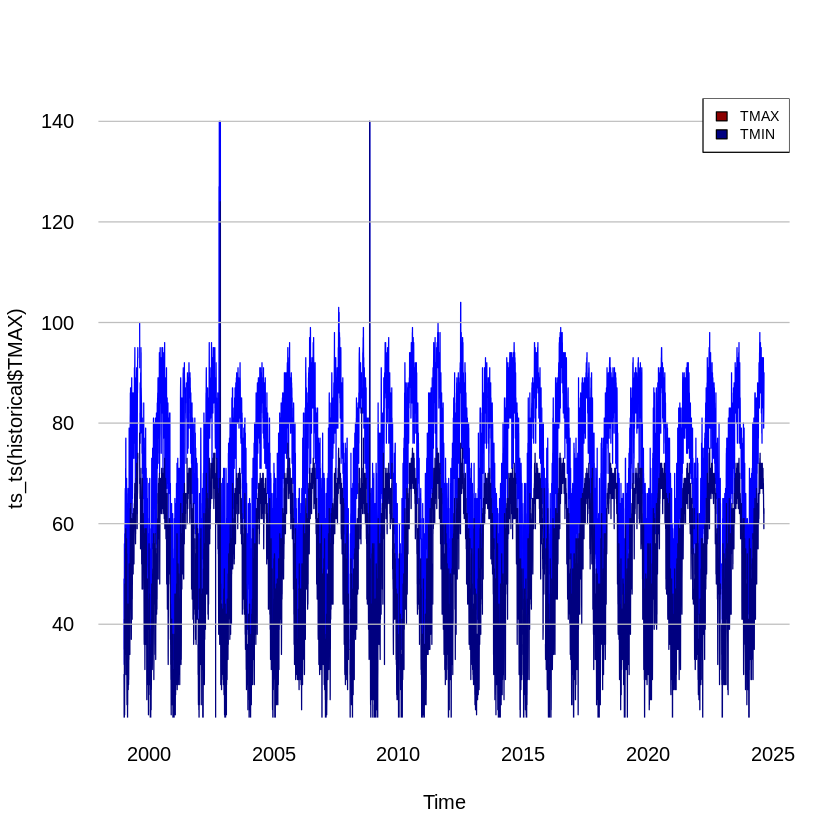

In [ ]:
plot(ts_ts(historical$TMAX), col="blue", bty="n", las=1, fg=NA)
lines(ts_ts(historical$TMIN), col="navy")
grid(nx=NA, ny=NULL, lty=1, col="gray")
legend("topright", fill=c("darkred", "navy"), cex=.7, legend=c("TMAX", "TMIN"), bg="white")